In [1]:
import json
from pathlib import Path
import glob

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 10

In [2]:
results_path = Path(".")
# results_path = Path("path/to/data/results/c${comps}_f3_n${nodes}_r5-result.json")

In [3]:
results = []
for results_file in results_path.rglob('*-result.json'):
    with open(results_file, "r") as f:
        results.append(json.load(f))

In [4]:
df_results = []

for result in results:
    # Add solver
    x = pd.concat([
        pd.DataFrame(v).assign(**{
            "solver" : k
        })
        for k, v in result.items()
    ])

    # Add test features
    test_feature = pd.DataFrame(
        x.problem.apply(lambda s : s.split("/")[-1][:-4].split("_")).tolist(),
        columns=["components", "flavours", "nodes", "resources", "test"]
    ).assign(**{
        "components" : lambda df : df.components.apply(lambda x : int(x[1:])),
        "flavours" : lambda df : df.flavours.apply(lambda x : int(x[1:])),
        "nodes" : lambda df : df.nodes.apply(lambda x : int(x[1:])),
        "resources" : lambda df : df.resources.apply(lambda x : int(x[1:]))
    })

    df_results.append(
        pd.merge(
            left=x,
            right=test_feature,
            right_index=True,
            left_index=True,
        ).drop(columns=["problem", "objectives"])
    )

df = pd.concat(df_results)

In [5]:
df

,status,flat_time,solve_time,solver,components,flavours,nodes,resources,test
0,OPTIMAL_SOLUTION,0.214,0.249,gurobi,1,2,13,2,0
1,UNSATISFIABLE,0.195,0.211,gurobi,1,2,13,2,1
2,OPTIMAL_SOLUTION,0.191,0.210,gurobi,1,2,13,2,3
3,OPTIMAL_SOLUTION,0.189,0.205,gurobi,1,2,13,2,2
4,UNSATISFIABLE,0.413,0.442,gurobi,11,2,12,5,0
...,...,...,...,...,...,...,...,...,...
1192,UNSATISFIABLE,0.220,0.237,gurobi,2,2,12,5,2
1193,UNSATISFIABLE,0.475,0.506,gurobi,12,2,13,5,0
1194,UNSATISFIABLE,0.422,0.452,gurobi,12,2,13,5,1
1195,UNSATISFIABLE,0.450,0.505,gurobi,12,2,13,5,3


In [6]:
df = df[["components", "flavours", "resources", "nodes", "test", "solver", "status", "flat_time", "solve_time"]]

In [7]:
#result_df.to_csv("./results.csv", index=False)

In [8]:
#satisfiable_df = df.query("status not in ['UNSATISFIABLE', 'UNKNOWN']")

# DataFrame Analisys

In [9]:
df.status.unique()

array(['OPTIMAL_SOLUTION', 'UNSATISFIABLE'], dtype=object)

In [10]:
df[["components", "status"]].groupby("components").value_counts()

components  status          
1           OPTIMAL_SOLUTION    102
            UNSATISFIABLE        24
2           UNSATISFIABLE        66
            OPTIMAL_SOLUTION     60
3           UNSATISFIABLE        68
            OPTIMAL_SOLUTION     53
4           UNSATISFIABLE        44
            OPTIMAL_SOLUTION     20
5           UNSATISFIABLE        39
            OPTIMAL_SOLUTION     25
6           UNSATISFIABLE        46
            OPTIMAL_SOLUTION     18
7           UNSATISFIABLE        53
            OPTIMAL_SOLUTION     10
8           UNSATISFIABLE        51
            OPTIMAL_SOLUTION     13
9           UNSATISFIABLE        48
            OPTIMAL_SOLUTION     15
10          UNSATISFIABLE        56
            OPTIMAL_SOLUTION      8
11          UNSATISFIABLE        56
            OPTIMAL_SOLUTION      8
12          UNSATISFIABLE        55
            OPTIMAL_SOLUTION      8
13          UNSATISFIABLE        57
            OPTIMAL_SOLUTION      6
14          UNSATISFIABLE        51

In [11]:
df[["nodes", "status"]].groupby("nodes").value_counts()

nodes  status          
1      UNSATISFIABLE       62
       OPTIMAL_SOLUTION    14
2      UNSATISFIABLE       51
       OPTIMAL_SOLUTION    25
3      UNSATISFIABLE       47
       OPTIMAL_SOLUTION    29
4      UNSATISFIABLE       46
       OPTIMAL_SOLUTION    30
5      UNSATISFIABLE       53
       OPTIMAL_SOLUTION    22
6      UNSATISFIABLE       54
       OPTIMAL_SOLUTION    22
7      UNSATISFIABLE       53
       OPTIMAL_SOLUTION    22
8      UNSATISFIABLE       51
       OPTIMAL_SOLUTION    24
9      UNSATISFIABLE       54
       OPTIMAL_SOLUTION    22
10     UNSATISFIABLE       57
       OPTIMAL_SOLUTION    18
11     UNSATISFIABLE       52
       OPTIMAL_SOLUTION    23
12     UNSATISFIABLE       51
       OPTIMAL_SOLUTION    24
13     UNSATISFIABLE       52
       OPTIMAL_SOLUTION    24
14     UNSATISFIABLE       51
       OPTIMAL_SOLUTION    24
15     UNSATISFIABLE       52
       OPTIMAL_SOLUTION    23
16     UNSATISFIABLE       46
       OPTIMAL_SOLUTION    19
Name: count, dty

In [12]:
pd.concat(
    [
        df[["components", "nodes", "status"]].groupby(["components", "nodes"]).value_counts(),
        df[["components", "nodes", "status"]].groupby(["components", "nodes"]).value_counts(normalize=True) * 100
    ],
    axis=1,
    keys=['counts', '%']
).reset_index()#.to_csv("./status_aggregated.csv", index=False)

,components,nodes,status,counts,%
0,1,1,OPTIMAL_SOLUTION,5,62.5
1,1,1,UNSATISFIABLE,3,37.5
2,1,2,OPTIMAL_SOLUTION,7,87.5
3,1,2,UNSATISFIABLE,1,12.5
4,1,3,OPTIMAL_SOLUTION,7,87.5
...,...,...,...,...,...
399,16,13,UNSATISFIABLE,3,75.0
400,16,13,OPTIMAL_SOLUTION,1,25.0
401,16,14,UNSATISFIABLE,4,100.0
402,16,15,UNSATISFIABLE,4,100.0


<Axes: >

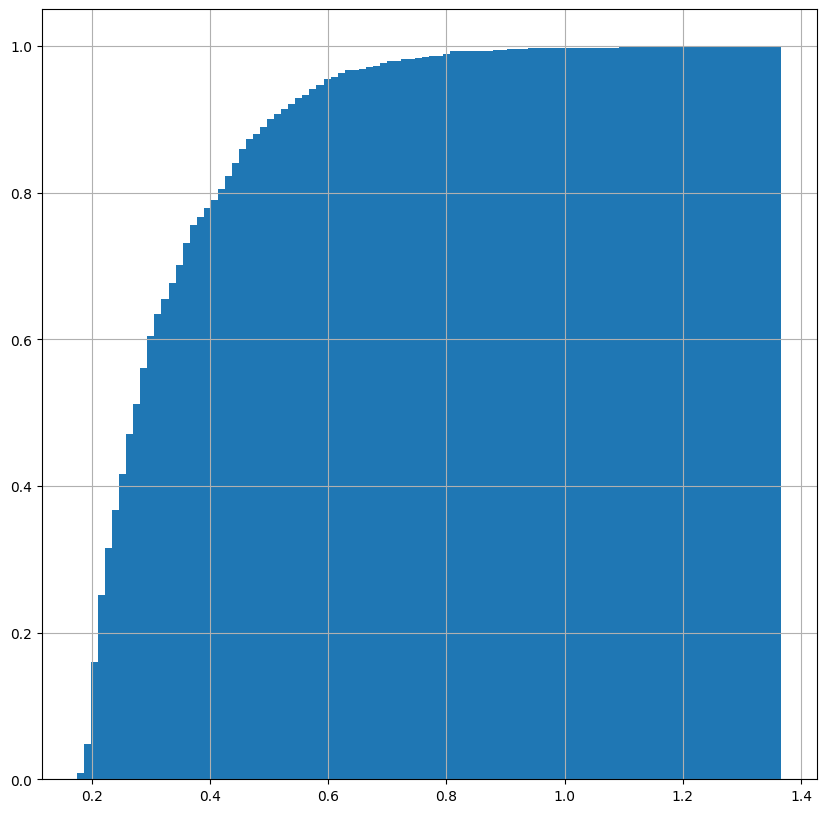

In [13]:
df.solve_time.sort_values().hist(cumulative=True, density=1, bins=100)

# Solve Time

<Axes: xlabel='components', ylabel='solve_time'>

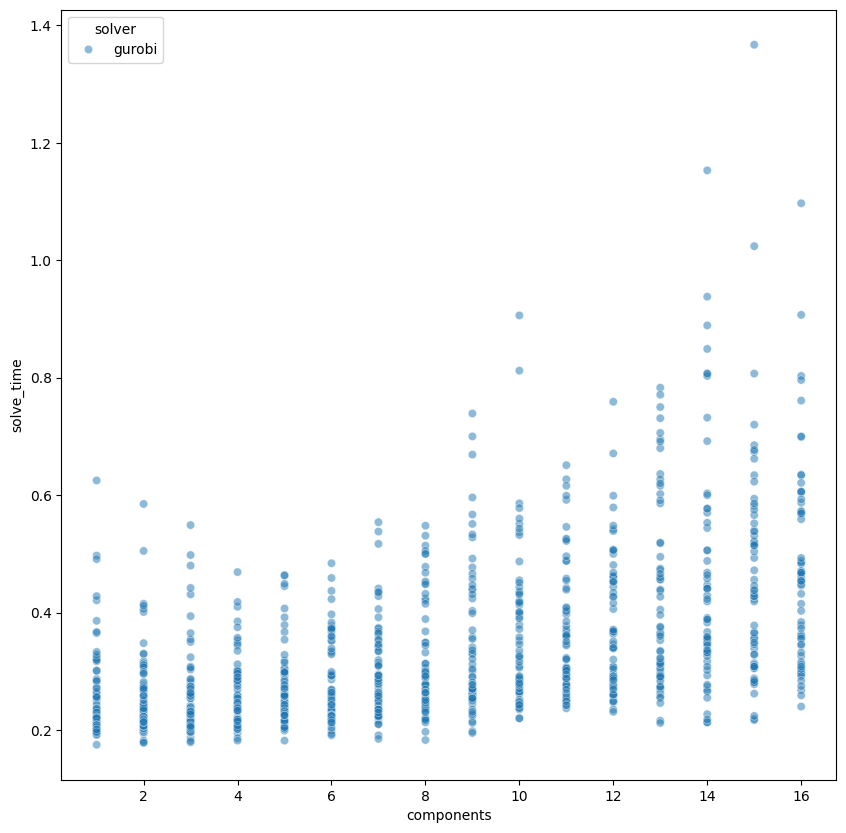

In [14]:
sns.scatterplot(data=df, x="components", y="solve_time", alpha=0.5, hue="solver")

<Axes: xlabel='nodes', ylabel='solve_time'>

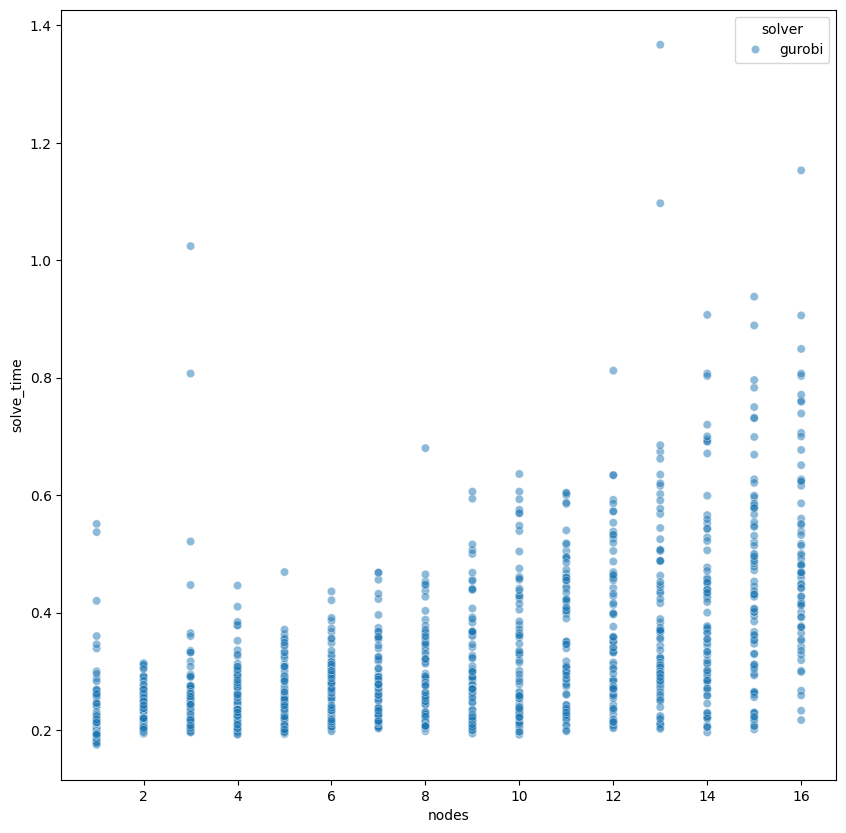

In [15]:
sns.scatterplot(data=df, x="nodes", y="solve_time", alpha=0.5, hue="solver")

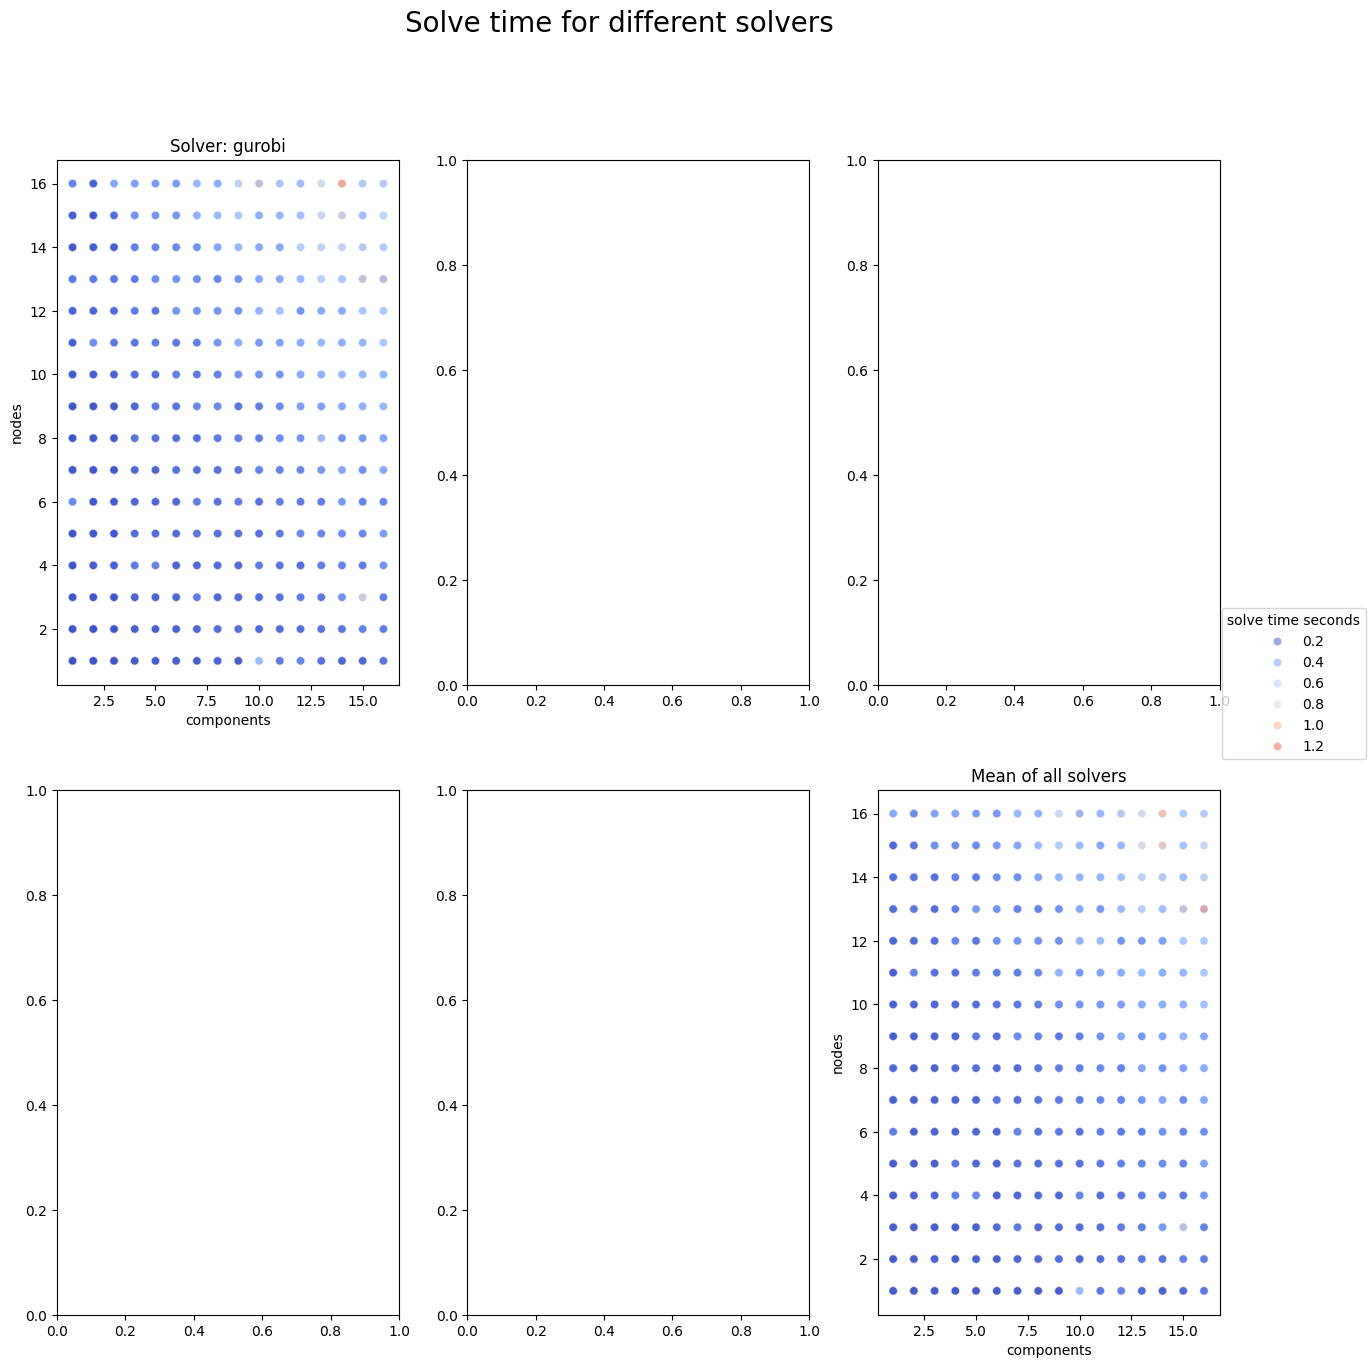

In [16]:
def scatter_components_nodes(df, ax=None, title=None):
    p = sns.scatterplot(
        data=df,
        x="components",
        y="nodes",
        alpha=0.5,
        hue="solve_time",
        palette="coolwarm",
        ax=ax
    )
    p.get_legend().remove()
    p.set_title(title)

# All solvers
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs_reshaped = axs.reshape(-1)
for solver, ax in zip(df.solver.unique(), axs_reshaped):
    scatter_components_nodes(
        df.query("solver == @solver"),
        ax=ax,
        title="Solver: " + solver
    )
    handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="center right",
    title="solve time seconds"
)
fig.suptitle("Solve time for different solvers", fontsize=20)

# Add mean of all solver
mean_by_solvers = df[["components", "nodes", "test", "solve_time"]].groupby(["components", "nodes", "test"]).mean().reset_index()
scatter_components_nodes(
    mean_by_solvers,
    ax = axs_reshaped[-1],
    title = "Mean of all solvers"
)

Text(0.5, 1.0, 'Solve time mean of all solvers of all tests')

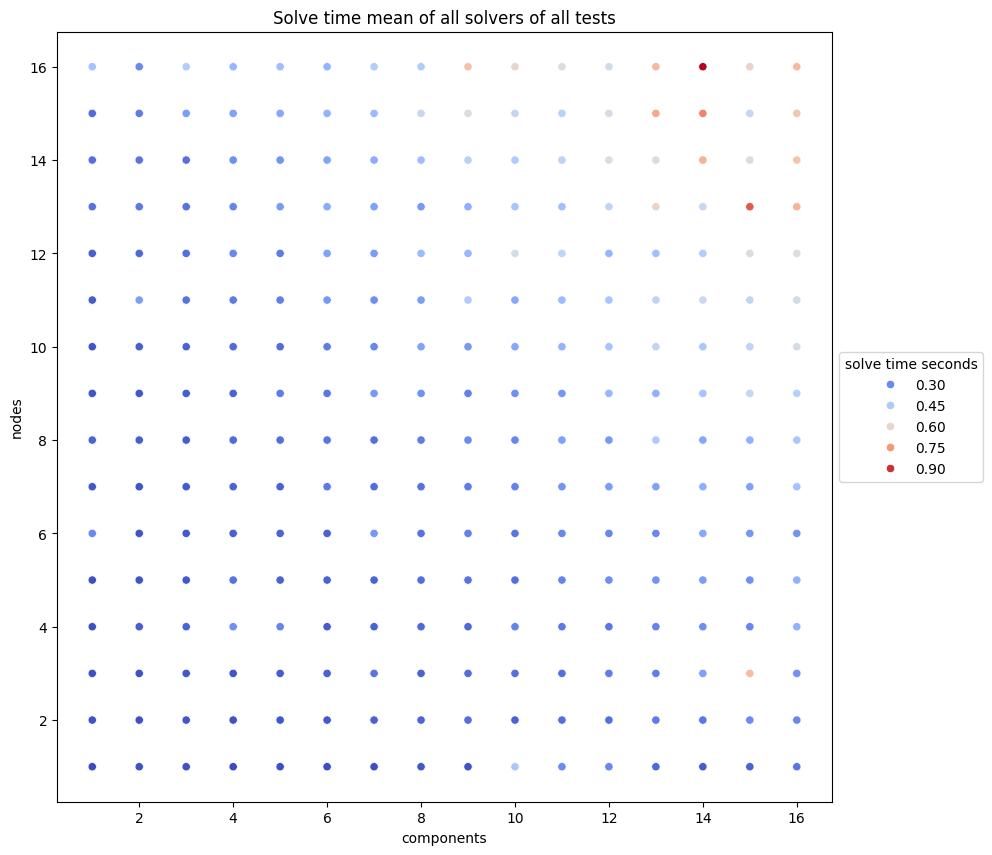

In [17]:
all_plot = sns.scatterplot(
    data=df[["components", "nodes", "solve_time"]].groupby(["components", "nodes"]).mean().reset_index(),
    x="components",
    y="nodes",
    hue="solve_time",
    palette="coolwarm"
)
all_plot.legend(title="solve time seconds", loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
all_plot.set_title("Solve time mean of all solvers of all tests")

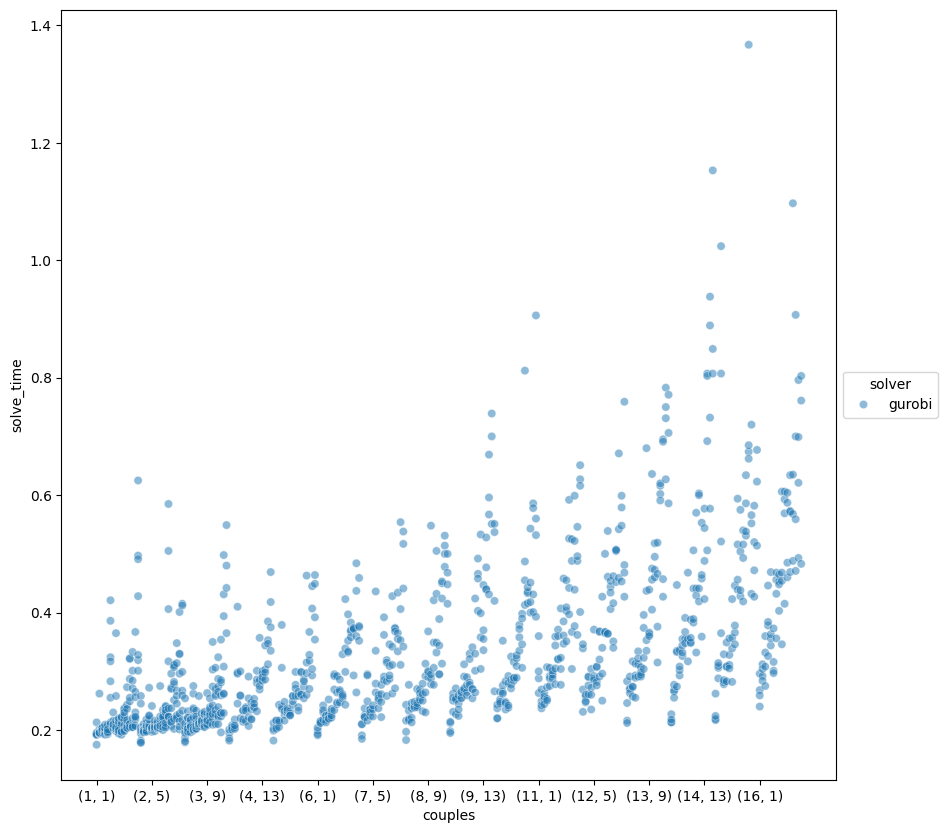

In [18]:
pair_df = df.sort_values(["components", "nodes"]).assign(**{
    "couples" : lambda df : df.apply(lambda x : (x["components"], x["nodes"]), axis=1)
})[["solver", "test", "couples", "solve_time"]]
pair_df["idx"] = pair_df.groupby("couples").ngroup()

show_every = 20
single_pairs = pair_df["couples"].drop_duplicates()
ticks = range(0, len(single_pairs.to_list()), show_every)
labels = single_pairs.apply(lambda x : str(x)).to_list()
labels = [labels[i] for i in ticks]

p = sns.scatterplot(pair_df, x="idx", y="solve_time", alpha=0.5, hue="solver")
p.set_xticks(ticks)
p.set_xticklabels(labels)
p.set_xlabel("couples")
p.legend(title="solver", loc='center left', bbox_to_anchor=(1, 0.5))

# Flat time

<Axes: xlabel='components', ylabel='flat_time'>

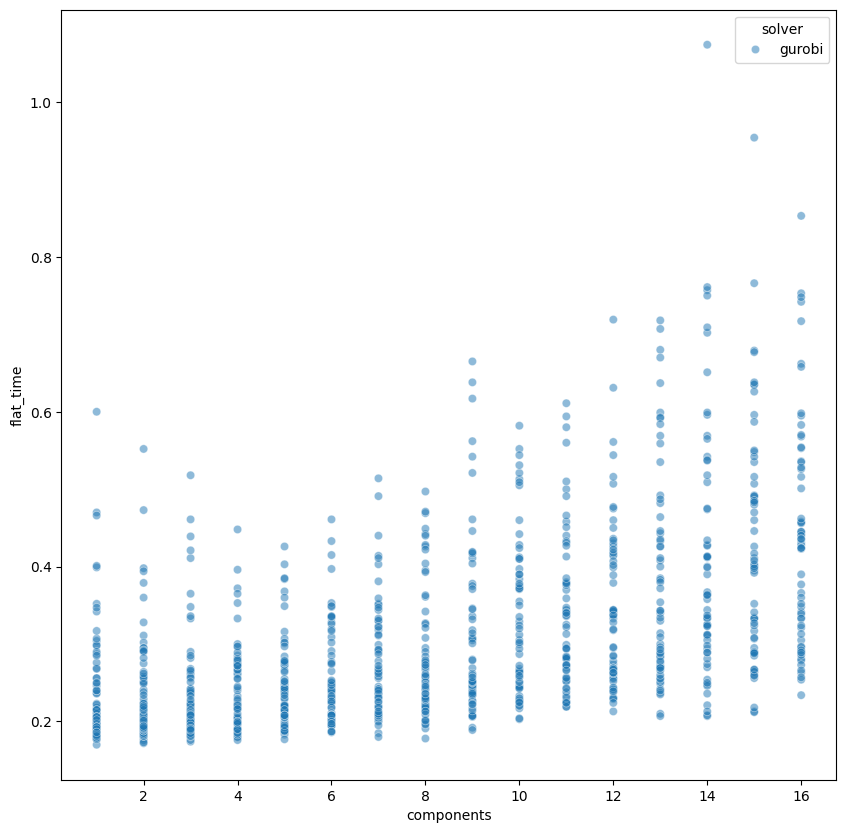

In [19]:
sns.scatterplot(data=df, x="components", y="flat_time", alpha=0.5, hue="solver")

<Axes: xlabel='nodes', ylabel='flat_time'>

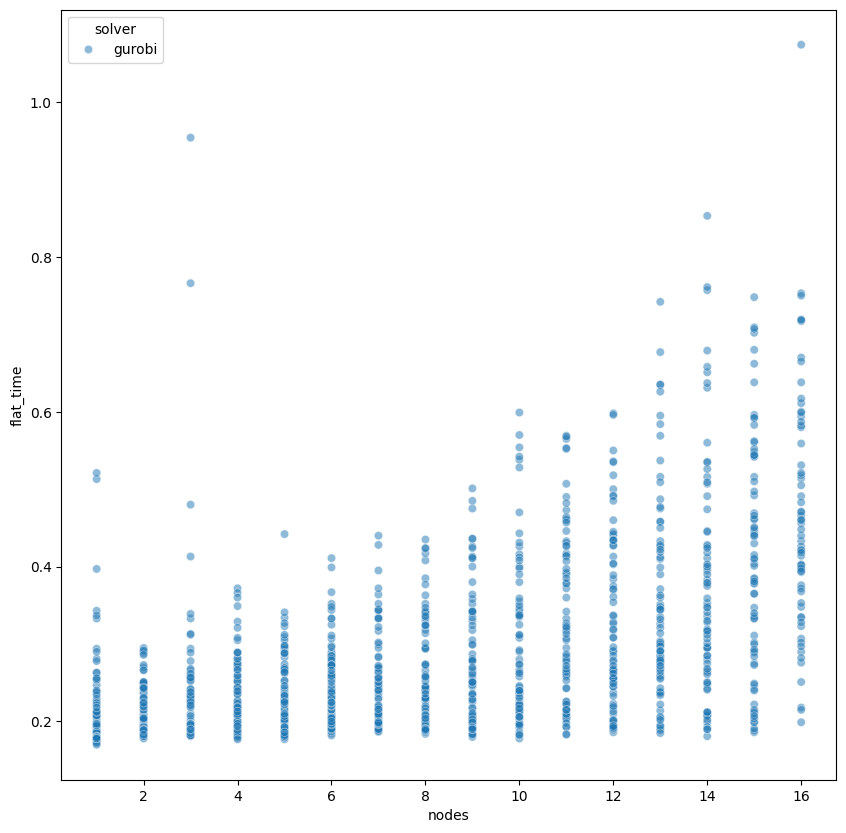

In [20]:
sns.scatterplot(data=df, x="nodes", y="flat_time", alpha=0.5, hue="solver")

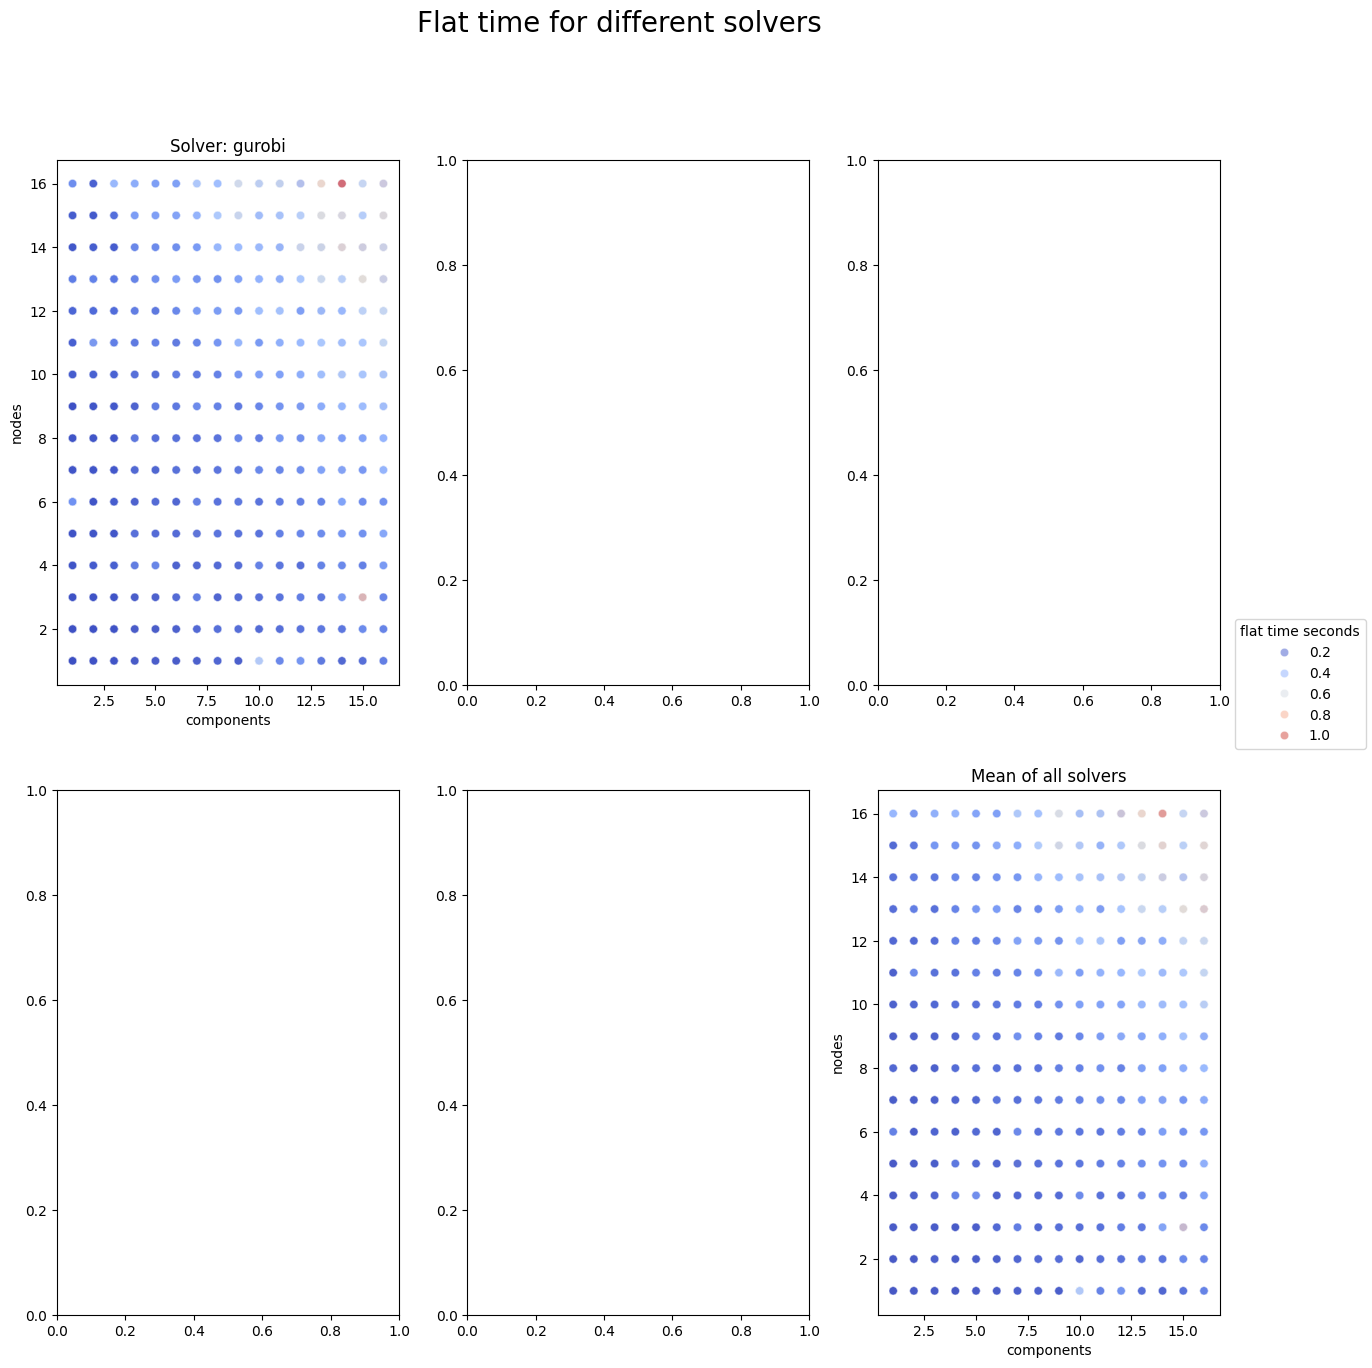

In [21]:
def scatter_components_nodes(df, ax=None, title=None):
    p = sns.scatterplot(
        data=df,
        x="components",
        y="nodes",
        alpha=0.5,
        hue="flat_time",
        palette="coolwarm",
        ax=ax
    )
    p.get_legend().remove()
    p.set_title(title)

# All solvers
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs_reshaped = axs.reshape(-1)
for solver, ax in zip(df.solver.unique(), axs_reshaped):
    scatter_components_nodes(
        df.query("solver == @solver"),
        ax=ax,
        title="Solver: " + solver
    )
    handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="center right",
    title="flat time seconds"
)
fig.suptitle("Flat time for different solvers", fontsize=20)

# Add mean of all solver
mean_by_solvers = df[["components", "nodes", "test", "flat_time"]].groupby(["components", "nodes", "test"]).mean().reset_index()
scatter_components_nodes(
    mean_by_solvers,
    ax = axs_reshaped[-1],
    title = "Mean of all solvers"
)

Text(0.5, 1.0, 'Flat time mean of all solvers of all tests')

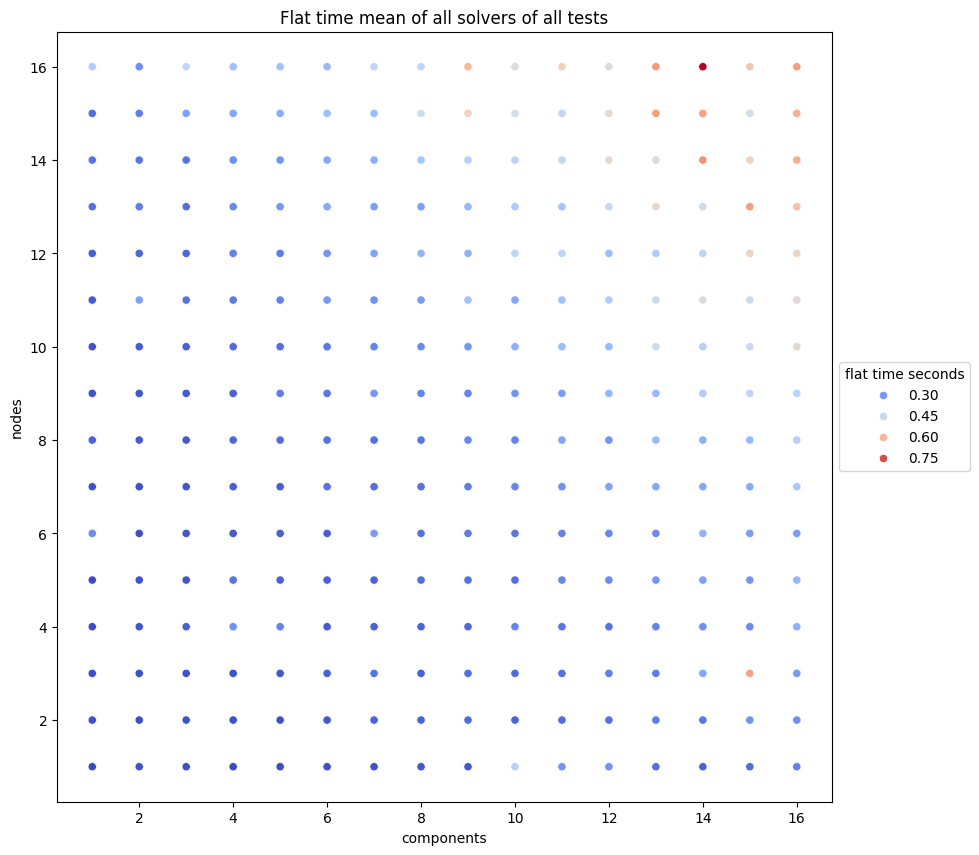

In [22]:
all_plot = sns.scatterplot(
    data=df[["components", "nodes", "flat_time"]].groupby(["components", "nodes"]).mean().reset_index(),
    x="components",
    y="nodes",
    hue="flat_time",
    palette="coolwarm"
)
all_plot.legend(title="flat time seconds", loc='center left', bbox_to_anchor=(1, 0.5))
all_plot.set_title("Flat time mean of all solvers of all tests")

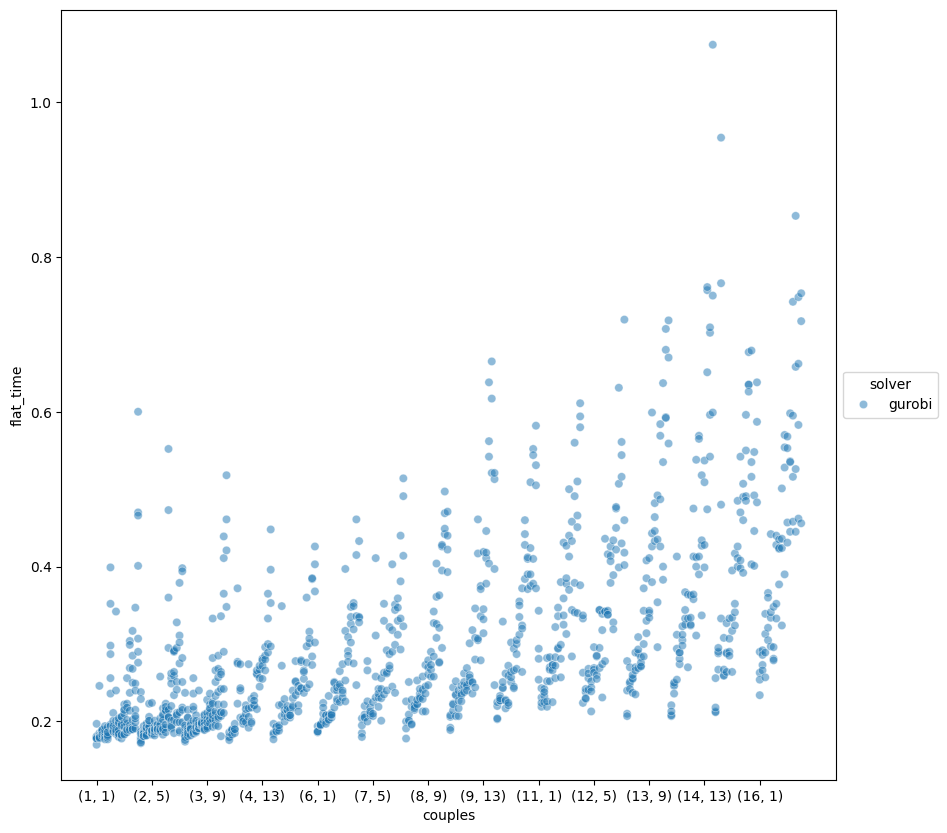

In [23]:
pair_df = df.sort_values(["components", "nodes"]).assign(**{
    "couples" : lambda df : df.apply(lambda x : (x["components"], x["nodes"]), axis=1)
})[["solver", "test", "couples", "flat_time"]]
pair_df["idx"] = pair_df.groupby("couples").ngroup()

show_every = 20
single_pairs = pair_df["couples"].drop_duplicates()
ticks = range(0, len(single_pairs.to_list()), show_every)
labels = single_pairs.apply(lambda x : str(x)).to_list()
labels = [labels[i] for i in ticks]

p = sns.scatterplot(pair_df, x="idx", y="flat_time", alpha=0.5, hue="solver")
p.set_xticks(ticks)
p.set_xticklabels(labels)
p.set_xlabel("couples")
p.legend(title="solver", loc='center left', bbox_to_anchor=(1, 0.5))